In [6]:
%pip install --upgrade --quiet tf-nightly-2.0-preview #tf-nightly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190612


In [2]:
import tensorflow as tf
import pandas as pd
print(tf.__version__)
import shutil
import os

inputs = {
    'a' : tf.keras.layers.Input(name='a', shape=(), dtype='float32'),
    'b' : tf.keras.layers.Input(name='b', shape=(), dtype='string'),
}
fc = {
    'a' : tf.feature_column.numeric_column('a'),
    'b' : tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list('b', ['one', 'two'])
    )
}

ds = tf.keras.layers.DenseFeatures(fc.values())(inputs)
output = tf.keras.layers.Dense(1, name='pred')(ds)
model = tf.keras.models.Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

df = pd.DataFrame.from_dict({
    'a': [3.0, 2.0, 1.0],
    'b': ['one', 'one', 'two'],
})
y =  [3.0, 2.0, 2.0]


shutil.rmtree('04_keras/checkpoints/', ignore_errors=True)
checkpoint_path = "04_keras/checkpoints/nightly.cpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit([df['a'], df['b']], y, steps_per_epoch=1, callbacks=[cp_callback])

model.predict({
    'a': tf.convert_to_tensor([3.0]),
    'b': tf.convert_to_tensor(['one']),
})

2.0.0-dev20190612


W0612 19:17:13.772991 140674492196608 deprecation.py:323] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow_core/python/feature_column/feature_column_v2.py:2703: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0612 19:17:13.804085 140674492196608 deprecation.py:323] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow_core/python/feature_column/feature_column_v2.py:4266: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0612 19:17:13.805199 140674492196608 deprecation.py:323] From /home/jupyter/.local/lib/python3.5/site-packages/tensorflow_core/python/feature_column/f

Train on 1 samples

Epoch 00001: saving model to 04_keras/checkpoints/nightly.cpt
1/1 [==============================] - 0s 86ms/step - loss: 2.1036


array([[1.4258742]], dtype=float32)

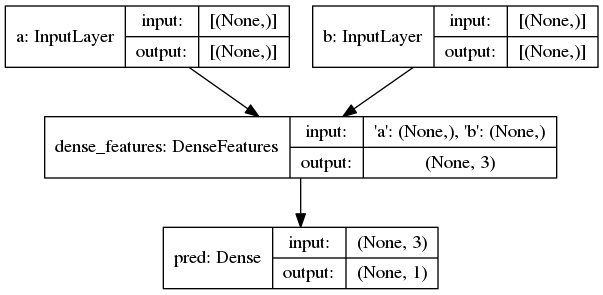

In [3]:
tf.keras.utils.plot_model(model, 'repro_model.png', show_shapes=True)

In [4]:
# Save as h5
model.save('04_keras/export/simple.h5')
newmodel = tf.keras.models.load_model('04_keras/export/simple.h5')
newmodel.predict({
    'a': tf.convert_to_tensor([3.0]),
    'b': tf.convert_to_tensor(['one']),
})

array([[1.4258742]], dtype=float32)

In [7]:
# export as SavedModel
shutil.rmtree('04_keras/export/savedmodel', ignore_errors=True)
tf.keras.experimental.export_saved_model(model, '04_keras/export/savedmodel')

W0612 19:23:05.972875 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer
W0612 19:23:05.974306 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.iter
W0612 19:23:05.975281 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.beta_1
W0612 19:23:05.976092 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.beta_2
W0612 19:23:05.976853 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.decay
W0612 19:23:05.977819 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0612 19:23:05.978675 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.kernel
W0612 19:23:05.979555 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.bias
W0612 19:23:05.980253 140674492196608 util.py:252] Un

In [8]:
!saved_model_cli show --tag_set serve --signature_def serving_default --dir 04_keras/export/savedmodel

The given SavedModel SignatureDef contains the following input(s):
  inputs['a'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1)
      name: a:0
  inputs['b'] tensor_info:
      dtype: DT_STRING
      shape: (-1)
      name: b:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['pred'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 1)
      name: pred/BiasAdd:0
Method name is: tensorflow/serving/predict


In [10]:
!find 04_keras/export/savedmodel

04_keras/export/savedmodel
04_keras/export/savedmodel/assets
04_keras/export/savedmodel/assets/saved_model.json
04_keras/export/savedmodel/variables
04_keras/export/savedmodel/variables/variables.data-00001-of-00002
04_keras/export/savedmodel/variables/variables.index
04_keras/export/savedmodel/variables/variables.data-00000-of-00001
04_keras/export/savedmodel/variables/variables.data-00000-of-00002
04_keras/export/savedmodel/variables/checkpoint
04_keras/export/savedmodel/saved_model.pb


In [9]:
# restore from SavedModel
loaded_model = tf.keras.experimental.load_from_saved_model('04_keras/export/saved_model')

W0612 19:23:30.495895 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer
W0612 19:23:30.497070 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.iter
W0612 19:23:30.497906 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.beta_1
W0612 19:23:30.498796 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.beta_2
W0612 19:23:30.499513 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.decay
W0612 19:23:30.500395 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0612 19:23:30.501069 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.kernel
W0612 19:23:30.501825 140674492196608 util.py:252] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.bias
W0612 19:23:30.502604 140674492196608 util.py:252] Un

NotFoundError: 04_keras/export/saved_model/assets/saved_model.json; No such file or directory